# Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt
import joblib

# Importing the dataset

In [2]:
dataset = pd.read_csv('Graduate.csv')
dataset

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


# Data Visualization

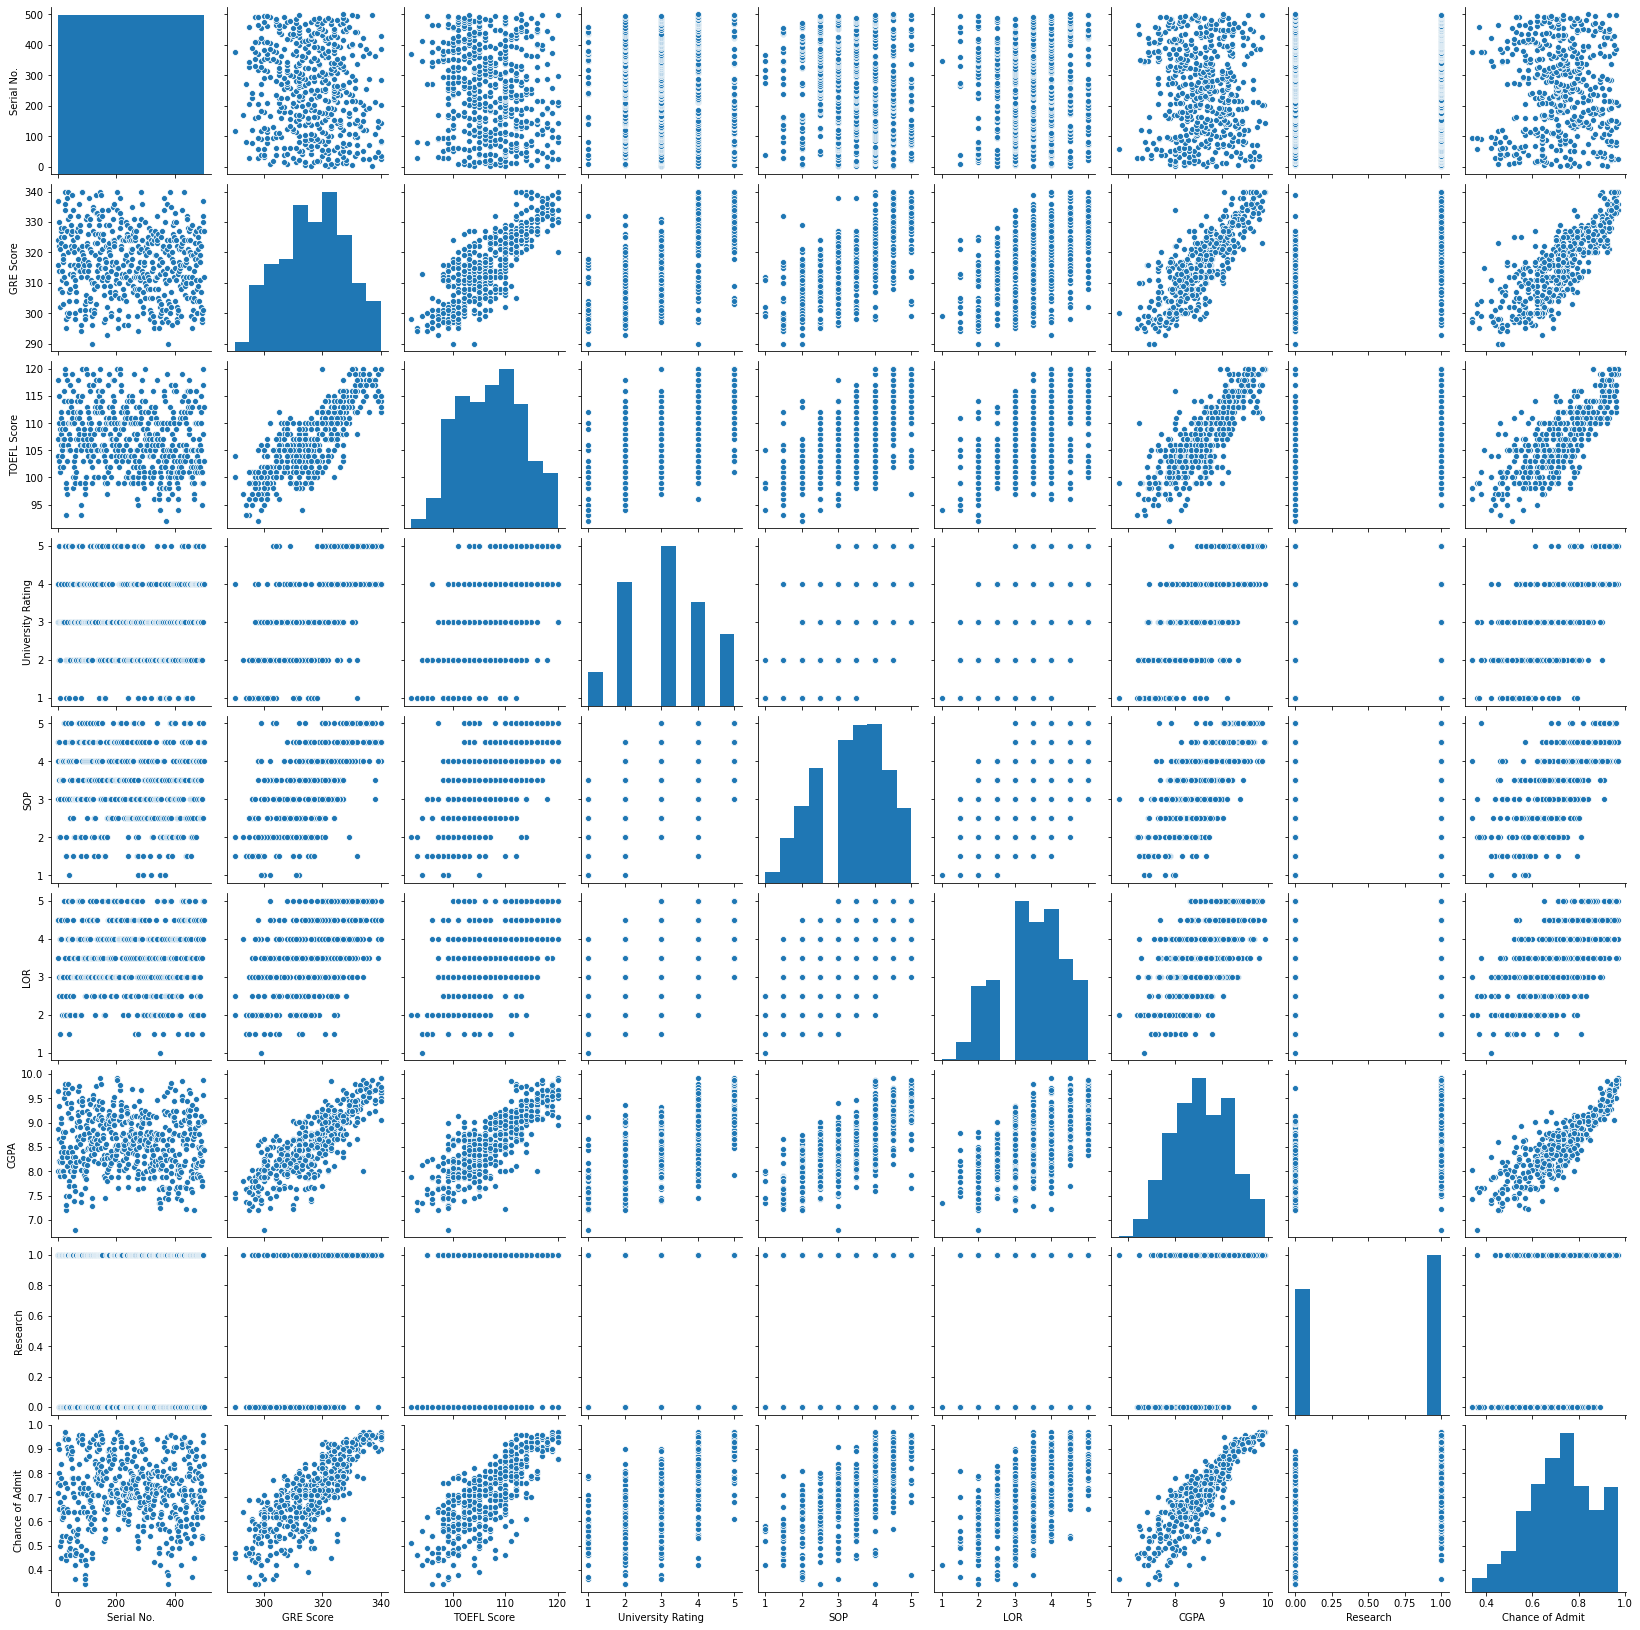

In [3]:
sns.pairplot(dataset)

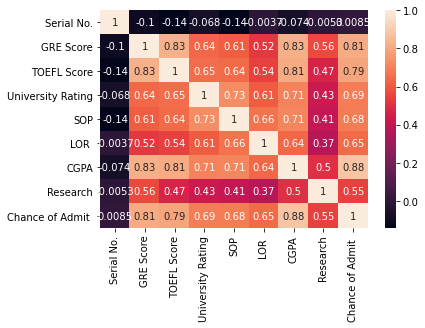

In [4]:
sns.heatmap(dataset.corr(),annot=True)

In [5]:
dataset.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.103839,-0.141696,-0.067641,-0.137352,-0.003694,-0.074289,-0.005332,0.008505
GRE Score,-0.103839,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,-0.141696,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,-0.067641,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,-0.137352,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,-0.003694,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,-0.074289,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,-0.005332,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.008505,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


# Taking care of missed data

In [6]:
dataset.isnull().any().any()

False

# Label Encoding and One Hot Encoding

# Checking and removing Outliers if any

In [7]:
z = np.abs(stats.zscore(dataset))
z

array([[1.72859016, 1.81923762, 1.77886545, ..., 1.77680627, 0.88640526,
        1.40610734],
       [1.72166195, 0.66714832, 0.03160087, ..., 0.48585943, 0.88640526,
        0.27134907],
       [1.71473373, 0.0418297 , 0.52536441, ..., 0.95404281, 0.88640526,
        0.0123405 ],
       ...,
       [1.71473373, 1.19888185, 2.10804114, ..., 1.62785086, 0.88640526,
        1.47702973],
       [1.72166195, 0.39631872, 0.68995225, ..., 0.24236699, 1.12815215,
        0.0585819 ],
       [1.72859016, 0.93301508, 0.95592621, ..., 0.76721964, 1.12815215,
        0.83872821]])

In [8]:
threshold = 3
np.where(z>threshold)

(array([], dtype=int64), array([], dtype=int64))

# Seperation of Dependent and Independent variables

In [9]:
x = dataset.iloc[:,1:-1].values
x

array([[337.  , 118.  ,   4.  , ...,   4.5 ,   9.65,   1.  ],
       [324.  , 107.  ,   4.  , ...,   4.5 ,   8.87,   1.  ],
       [316.  , 104.  ,   3.  , ...,   3.5 ,   8.  ,   1.  ],
       ...,
       [330.  , 120.  ,   5.  , ...,   5.  ,   9.56,   1.  ],
       [312.  , 103.  ,   4.  , ...,   5.  ,   8.43,   0.  ],
       [327.  , 113.  ,   4.  , ...,   4.5 ,   9.04,   0.  ]])

In [10]:
y = dataset.iloc[:,-1].values
y

array([0.92, 0.76, 0.72, 0.8 , 0.65, 0.9 , 0.75, 0.68, 0.5 , 0.45, 0.52,
       0.84, 0.78, 0.62, 0.61, 0.54, 0.66, 0.65, 0.63, 0.62, 0.64, 0.7 ,
       0.94, 0.95, 0.97, 0.94, 0.76, 0.44, 0.46, 0.54, 0.65, 0.74, 0.91,
       0.9 , 0.94, 0.88, 0.64, 0.58, 0.52, 0.48, 0.46, 0.49, 0.53, 0.87,
       0.91, 0.88, 0.86, 0.89, 0.82, 0.78, 0.76, 0.56, 0.78, 0.72, 0.7 ,
       0.64, 0.64, 0.46, 0.36, 0.42, 0.48, 0.47, 0.54, 0.56, 0.52, 0.55,
       0.61, 0.57, 0.68, 0.78, 0.94, 0.96, 0.93, 0.84, 0.74, 0.72, 0.74,
       0.64, 0.44, 0.46, 0.5 , 0.96, 0.92, 0.92, 0.94, 0.76, 0.72, 0.66,
       0.64, 0.74, 0.64, 0.38, 0.34, 0.44, 0.36, 0.42, 0.48, 0.86, 0.9 ,
       0.79, 0.71, 0.64, 0.62, 0.57, 0.74, 0.69, 0.87, 0.91, 0.93, 0.68,
       0.61, 0.69, 0.62, 0.72, 0.59, 0.66, 0.56, 0.45, 0.47, 0.71, 0.94,
       0.94, 0.57, 0.61, 0.57, 0.64, 0.85, 0.78, 0.84, 0.92, 0.96, 0.77,
       0.71, 0.79, 0.89, 0.82, 0.76, 0.71, 0.8 , 0.78, 0.84, 0.9 , 0.92,
       0.97, 0.8 , 0.81, 0.75, 0.83, 0.96, 0.79, 0.

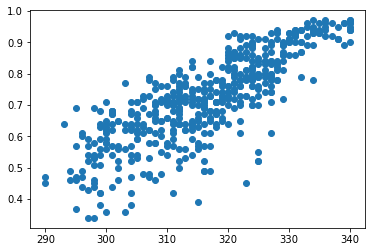

In [11]:
plt.scatter(x[:,0],y)

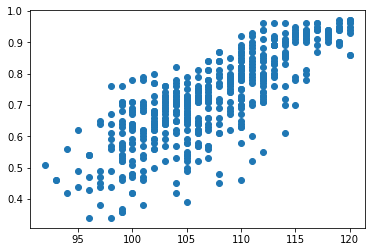

In [12]:
plt.scatter(x[:,1],y)

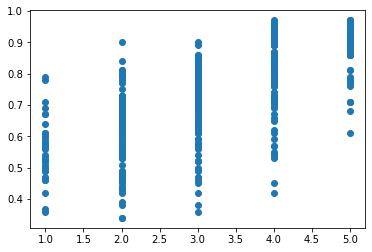

In [13]:
plt.scatter(x[:,2],y)

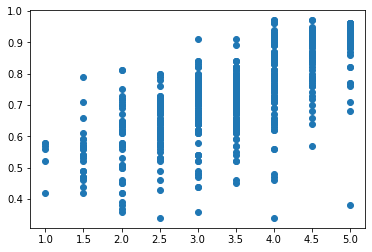

In [14]:
plt.scatter(x[:,3],y)

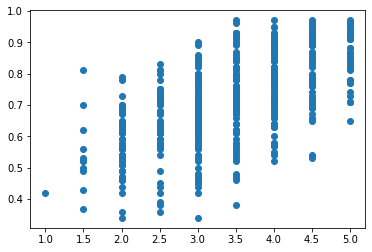

In [15]:
plt.scatter(x[:,4],y)

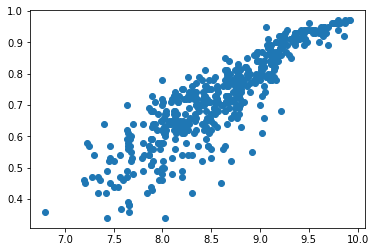

In [16]:
plt.scatter(x[:,5],y)

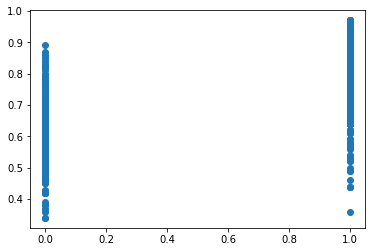

In [17]:
plt.scatter(x[:,6],y)


# Feature Scaling

In [18]:
sc1=StandardScaler()
x=sc1.fit_transform(x)
x

array([[ 1.81923762,  1.77886545,  0.77558214, ...,  1.09894429,
         1.77680627,  0.88640526],
       [ 0.66714832, -0.03160087,  0.77558214, ...,  1.09894429,
         0.48585943,  0.88640526],
       [-0.0418297 , -0.52536441, -0.09979274, ...,  0.01730621,
        -0.95404281,  0.88640526],
       ...,
       [ 1.19888185,  2.10804114,  1.65095702, ...,  1.63976333,
         1.62785086,  0.88640526],
       [-0.39631872, -0.68995225,  0.77558214, ...,  1.63976333,
        -0.24236699, -1.12815215],
       [ 0.93301508,  0.95592621,  0.77558214, ...,  1.09894429,
         0.76721964, -1.12815215]])

# Splitting data into Train and Test

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=102)

In [20]:
x_train

array([[-0.0418297 ,  0.29757483,  0.77558214, ...,  0.01730621,
         0.30380282,  0.88640526],
       [ 0.57852607,  0.13298698, -0.09979274, ..., -0.52351283,
         0.03899321, -1.12815215],
       [-0.48494097, -0.52536441, -0.09979274, ...,  0.01730621,
        -0.73888501,  0.88640526],
       ...,
       [-1.81427477, -2.00665503, -0.97516761, ..., -1.60515091,
        -1.71537044,  0.88640526],
       [ 0.75577058,  1.12051406, -0.09979274, ..., -0.52351283,
         0.76721964,  0.88640526],
       [-0.66218548, -1.34830364, -0.09979274, ...,  0.55812525,
        -0.02720919, -1.12815215]])

In [21]:
x_test

array([[ 2.08510438,  2.10804114,  0.77558214, ...,  0.55812525,
         2.22367248,  0.88640526],
       [ 1.11025959,  0.95592621,  0.77558214, ...,  0.01730621,
         1.29683885,  0.88640526],
       [ 0.04679255,  0.46216267, -0.09979274, ...,  1.09894429,
         0.88307384,  0.88640526],
       ...,
       [-1.99151928, -2.00665503, -1.85054249, ..., -2.14596996,
        -1.54986443, -1.12815215],
       [-2.34600829, -0.52536441,  0.77558214, ..., -1.06433187,
        -1.84777524, -1.12815215],
       [ 0.22403706, -0.36077656, -0.09979274, ...,  0.01730621,
         0.15484742,  0.88640526]])

# Training and Testing Data Model Using Random Forest Regressor

In [22]:
regressor = RandomForestRegressor()

In [23]:
#randomized search cv parameters

n_estimators=[int(x) for x in np.linspace(100,1200,12)]
max_depth = [int(x) for x in np.linspace(5,30,6)]
min_samples_leaf = [1,2,5,10]

In [24]:
random_grid={'n_estimators':n_estimators,
            'max_depth':max_depth,
             'min_samples_leaf':min_samples_leaf
            }
random_grid

{'n_estimators': [100,
  200,
  300,
  400,
  500,
  600,
  700,
  800,
  900,
  1000,
  1100,
  1200],
 'max_depth': [5, 10, 15, 20, 25, 30],
 'min_samples_leaf': [1, 2, 5, 10]}

In [25]:
rf_random= RandomizedSearchCV(estimator=regressor,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter = 10,cv = 5,random_state=0)

In [26]:
rf_random.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=0, scoring='neg_mean_squared_error')

In [27]:
rf_random.best_params_

{'n_estimators': 300, 'min_samples_leaf': 10, 'max_depth': 30}

In [28]:
predictions = rf_random.predict(x_test)
predictions

array([0.93988574, 0.90376301, 0.81672741, 0.93939983, 0.72692014,
       0.9405263 , 0.72478201, 0.64647656, 0.56105273, 0.62191838,
       0.68791067, 0.56451439, 0.62399001, 0.64554706, 0.67389444,
       0.58069103, 0.65052402, 0.6667794 , 0.67439639, 0.68693458,
       0.77288656, 0.85982432, 0.70932405, 0.70794881, 0.68312949,
       0.47825976, 0.77600404, 0.92129913, 0.8856233 , 0.76246564,
       0.77921022, 0.91170393, 0.86172325, 0.94084206, 0.54423394,
       0.80223611, 0.8967696 , 0.65391859, 0.81349562, 0.69188658,
       0.6370093 , 0.53283839, 0.69608472, 0.7596878 , 0.65893543,
       0.74294001, 0.8972088 , 0.91946336, 0.8503374 , 0.54278657,
       0.90158008, 0.69911003, 0.56206354, 0.69261135, 0.65498728,
       0.90503119, 0.91729844, 0.94005618, 0.94158422, 0.86462717,
       0.62300883, 0.55217094, 0.93775342, 0.78328283, 0.55592475,
       0.84031055, 0.59003229, 0.64152318, 0.93978136, 0.92049066,
       0.9389676 , 0.78332125, 0.64689159, 0.63858284, 0.86359

# Evaluation

In [29]:
r2_score(y_test,predictions)

0.8633944338063388

In [30]:
mse = mean_squared_error(y_test,predictions)

In [31]:
rmse = sqrt(mse)
rmse

0.0530246369208016

# Training and Testing Data Model Using Decision Tree Regression

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=102)

In [33]:
from sklearn.tree import DecisionTreeRegressor

In [34]:
dt=DecisionTreeRegressor(criterion="mse",random_state=0)
dt.fit(x_train,y_train)

DecisionTreeRegressor(random_state=0)

In [35]:
y_test

array([0.97, 0.89, 0.8 , 0.96, 0.72, 0.94, 0.72, 0.46, 0.61, 0.63, 0.62,
       0.44, 0.64, 0.65, 0.69, 0.55, 0.65, 0.64, 0.65, 0.54, 0.82, 0.84,
       0.78, 0.76, 0.71, 0.47, 0.76, 0.94, 0.91, 0.82, 0.8 , 0.93, 0.89,
       0.94, 0.69, 0.78, 0.92, 0.64, 0.84, 0.42, 0.6 , 0.51, 0.73, 0.75,
       0.68, 0.77, 0.9 , 0.91, 0.85, 0.54, 0.86, 0.76, 0.61, 0.67, 0.71,
       0.92, 0.92, 0.97, 0.96, 0.86, 0.71, 0.53, 0.96, 0.85, 0.42, 0.79,
       0.56, 0.62, 0.96, 0.92, 0.93, 0.82, 0.68, 0.64, 0.88, 0.64, 0.84,
       0.64, 0.82, 0.86, 0.67, 0.89, 0.74, 0.65, 0.72, 0.76, 0.73, 0.89,
       0.87, 0.94, 0.95, 0.79, 0.89, 0.65, 0.78, 0.88, 0.91, 0.56, 0.81,
       0.54, 0.83, 0.69, 0.72, 0.71, 0.56, 0.63, 0.66, 0.54, 0.57, 0.71,
       0.69, 0.66, 0.79, 0.57, 0.75, 0.94, 0.91, 0.77, 0.73, 0.64, 0.92,
       0.9 , 0.71, 0.88, 0.82, 0.8 , 0.66, 0.78, 0.71, 0.92, 0.92, 0.66,
       0.76, 0.74, 0.49, 0.91, 0.81, 0.78, 0.59, 0.79, 0.36, 0.78, 0.96,
       0.5 , 0.62, 0.85, 0.7 , 0.49, 0.45, 0.73])

In [36]:
y_pred=dt.predict(x_test)
y_pred

array([0.96, 0.85, 0.79, 0.97, 0.74, 0.95, 0.71, 0.7 , 0.61, 0.64, 0.53,
       0.68, 0.68, 0.54, 0.64, 0.53, 0.72, 0.56, 0.56, 0.7 , 0.71, 0.86,
       0.7 , 0.76, 0.75, 0.37, 0.76, 0.91, 0.92, 0.73, 0.78, 0.9 , 0.89,
       0.94, 0.6 , 0.79, 0.87, 0.72, 0.87, 0.61, 0.7 , 0.51, 0.74, 0.7 ,
       0.71, 0.76, 0.9 , 0.9 , 0.86, 0.57, 0.91, 0.7 , 0.39, 0.65, 0.62,
       0.9 , 0.94, 0.96, 0.96, 0.89, 0.67, 0.57, 0.97, 0.85, 0.54, 0.8 ,
       0.67, 0.64, 0.96, 0.91, 0.9 , 0.78, 0.62, 0.73, 0.86, 0.73, 0.82,
       0.58, 0.8 , 0.83, 0.71, 0.89, 0.73, 0.73, 0.7 , 0.71, 0.67, 0.91,
       0.86, 0.95, 0.95, 0.7 , 0.95, 0.79, 0.8 , 0.86, 0.89, 0.57, 0.87,
       0.57, 0.84, 0.73, 0.76, 0.62, 0.72, 0.79, 0.77, 0.47, 0.52, 0.62,
       0.85, 0.62, 0.87, 0.73, 0.79, 0.94, 0.89, 0.78, 0.52, 0.68, 0.87,
       0.86, 0.77, 0.9 , 0.74, 0.77, 0.67, 0.86, 0.75, 0.94, 0.95, 0.73,
       0.75, 0.59, 0.57, 0.86, 0.87, 0.72, 0.65, 0.76, 0.47, 0.82, 0.96,
       0.62, 0.73, 0.83, 0.71, 0.37, 0.59, 0.84])

# Evaluation

In [37]:
r2_score(y_test,y_pred)

0.7312858890109663

In [38]:
mse = mean_squared_error(y_test,y_pred)

In [39]:
rmse = sqrt(mse)
rmse

0.07436845209271647

# Training and Testing Data Model Using Multi Linear Regression

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=102)

In [41]:
mr = LinearRegression()
mr.fit(x_train,y_train)

LinearRegression()

In [42]:
y_pred = mr.predict(x_test)
y_pred

array([0.98392749, 0.87052968, 0.81860552, 0.94840838, 0.72670215,
       0.9554992 , 0.74211252, 0.65274412, 0.55625703, 0.60115961,
       0.64709074, 0.57629002, 0.62322382, 0.6229508 , 0.68600239,
       0.5860235 , 0.63288626, 0.64752273, 0.69488846, 0.64534051,
       0.8144511 , 0.83897377, 0.72650796, 0.71148135, 0.70033575,
       0.48112866, 0.79214178, 0.91820817, 0.91197074, 0.77027343,
       0.79740063, 0.90512368, 0.86191734, 0.95271799, 0.53326493,
       0.7576453 , 0.88344437, 0.62444231, 0.83676221, 0.6237162 ,
       0.64520817, 0.50413256, 0.71029728, 0.75384828, 0.64049137,
       0.76399072, 0.89623032, 0.92817675, 0.85554394, 0.54185587,
       0.90156524, 0.67303736, 0.61359633, 0.64881646, 0.64032152,
       0.89019777, 0.92462569, 1.00023108, 0.97803788, 0.8492642 ,
       0.64992632, 0.60741888, 0.9633041 , 0.79059769, 0.57367115,
       0.81991934, 0.62178421, 0.61728235, 0.96787082, 0.9086362 ,
       0.90988281, 0.80803305, 0.65078956, 0.65564193, 0.85752

In [43]:
y_test

array([0.97, 0.89, 0.8 , 0.96, 0.72, 0.94, 0.72, 0.46, 0.61, 0.63, 0.62,
       0.44, 0.64, 0.65, 0.69, 0.55, 0.65, 0.64, 0.65, 0.54, 0.82, 0.84,
       0.78, 0.76, 0.71, 0.47, 0.76, 0.94, 0.91, 0.82, 0.8 , 0.93, 0.89,
       0.94, 0.69, 0.78, 0.92, 0.64, 0.84, 0.42, 0.6 , 0.51, 0.73, 0.75,
       0.68, 0.77, 0.9 , 0.91, 0.85, 0.54, 0.86, 0.76, 0.61, 0.67, 0.71,
       0.92, 0.92, 0.97, 0.96, 0.86, 0.71, 0.53, 0.96, 0.85, 0.42, 0.79,
       0.56, 0.62, 0.96, 0.92, 0.93, 0.82, 0.68, 0.64, 0.88, 0.64, 0.84,
       0.64, 0.82, 0.86, 0.67, 0.89, 0.74, 0.65, 0.72, 0.76, 0.73, 0.89,
       0.87, 0.94, 0.95, 0.79, 0.89, 0.65, 0.78, 0.88, 0.91, 0.56, 0.81,
       0.54, 0.83, 0.69, 0.72, 0.71, 0.56, 0.63, 0.66, 0.54, 0.57, 0.71,
       0.69, 0.66, 0.79, 0.57, 0.75, 0.94, 0.91, 0.77, 0.73, 0.64, 0.92,
       0.9 , 0.71, 0.88, 0.82, 0.8 , 0.66, 0.78, 0.71, 0.92, 0.92, 0.66,
       0.76, 0.74, 0.49, 0.91, 0.81, 0.78, 0.59, 0.79, 0.36, 0.78, 0.96,
       0.5 , 0.62, 0.85, 0.7 , 0.49, 0.45, 0.73])

In [44]:
r2_score(y_test,y_pred)

0.8741849196018767

# Back Propogation

In [45]:
#y=a0+a1x1+a2x2+....

In [46]:
x.shape

(500, 7)

In [47]:
x= np.append(arr= np.ones((500,1)).astype(int),values=x,axis=1)
x


array([[ 1.        ,  1.81923762,  1.77886545, ...,  1.09894429,
         1.77680627,  0.88640526],
       [ 1.        ,  0.66714832, -0.03160087, ...,  1.09894429,
         0.48585943,  0.88640526],
       [ 1.        , -0.0418297 , -0.52536441, ...,  0.01730621,
        -0.95404281,  0.88640526],
       ...,
       [ 1.        ,  1.19888185,  2.10804114, ...,  1.63976333,
         1.62785086,  0.88640526],
       [ 1.        , -0.39631872, -0.68995225, ...,  1.63976333,
        -0.24236699, -1.12815215],
       [ 1.        ,  0.93301508,  0.95592621, ...,  1.09894429,
         0.76721964, -1.12815215]])

In [48]:
x_opt=np.array(x[:,[0,1,2,3,4,5,6,7]],dtype=float)
x_opt

array([[ 1.        ,  1.81923762,  1.77886545, ...,  1.09894429,
         1.77680627,  0.88640526],
       [ 1.        ,  0.66714832, -0.03160087, ...,  1.09894429,
         0.48585943,  0.88640526],
       [ 1.        , -0.0418297 , -0.52536441, ...,  0.01730621,
        -0.95404281,  0.88640526],
       ...,
       [ 1.        ,  1.19888185,  2.10804114, ...,  1.63976333,
         1.62785086,  0.88640526],
       [ 1.        , -0.39631872, -0.68995225, ...,  1.63976333,
        -0.24236699, -1.12815215],
       [ 1.        ,  0.93301508,  0.95592621, ...,  1.09894429,
         0.76721964, -1.12815215]])

In [49]:
x_opt.shape

(500, 8)

In [50]:
regression_OLS=sm.OLS(endog=y,exog=x_opt).fit()
regression_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     324.4
Date:                Sat, 05 Sep 2020   Prob (F-statistic):          8.21e-180
Time:                        19:13:58   Log-Likelihood:                 701.38
No. Observations:                 500   AIC:                            -1387.
Df Residuals:                     492   BIC:                            -1353.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7217      0.003    269.039      0.000       0.716       0.727
x1             0.0210      0.006      3.700      0.000       0.010       0.032
x2             0.0169      0.005      3.184      0.002       0.006       0.027
x3             0.0068      0.004      1.563      0.119      -0.002       0.015
x4             0.0016      0.005      0.348      0.728      -0.007       0.010
x5             0.0156      0.004      4.074      0.000       0.008       0.023
x6             0.0715      0.006     12.198      0.000       0.060       0.083
x7             0.0121      0.003      3.680      0.000       0.006       0.019
==============================================================================
Omnibus:                      112.770   Durbin-Watson:                   0.796
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              262.104
Skew:                          -1.160   Prob(JB):                     1.22e-57
Kurtosis:                       5.684   Cond. No.                         5.65
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
x_opt=np.array(x[:,[0,1,2,3,5,6,7]],dtype=float)
x_opt
regression_OLS=sm.OLS(endog=y,exog=x_opt).fit()
regression_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     379.1
Date:                Sat, 05 Sep 2020   Prob (F-statistic):          4.29e-181
Time:                        19:13:58   Log-Likelihood:                 701.32
No. Observations:                 500   AIC:                            -1389.
Df Residuals:                     493   BIC:                            -1359.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7217      0.003    269.279      0.000       0.716       0.727
x1             0.0209      0.006      3.694      0.000       0.010       0.032
x2             0.0171      0.005      3.236      0.001       0.007       0.027
x3             0.0073      0.004      1.820      0.069      -0.001       0.015
x4             0.0160      0.004      4.380      0.000       0.009       0.023
x5             0.0719      0.006     12.481      0.000       0.061       0.083
x6             0.0121      0.003      3.691      0.000       0.006       0.019
==============================================================================
Omnibus:                      111.782   Durbin-Watson:                   0.800
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.656
Skew:                          -1.152   Prob(JB):                     6.82e-57
Kurtosis:                       5.667   Cond. No.                         5.21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
x_opt=np.array(x[:,[0,1,2,5,6,7]],dtype=float)
x_opt
regression_OLS=sm.OLS(endog=y,exog=x_opt).fit()
regression_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     452.1
Date:                Sat, 05 Sep 2020   Prob (F-statistic):          9.97e-182
Time:                        19:13:58   Log-Likelihood:                 699.65
No. Observations:                 500   AIC:                            -1387.
Df Residuals:                     494   BIC:                            -1362.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7217      0.003    268.651      0.000       0.716       0.727
x1             0.0213      0.006      3.760      0.000       0.010       0.032
x2             0.0183      0.005      3.501      0.001       0.008       0.029
x3             0.0179      0.004      5.092      0.000       0.011       0.025
x4             0.0743      0.006     13.221      0.000       0.063       0.085
x5             0.0125      0.003      3.814      0.000       0.006       0.019
==============================================================================
Omnibus:                      109.027   Durbin-Watson:                   0.800
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              248.874
Skew:                          -1.130   Prob(JB):                     9.07e-55
Kurtosis:                       5.615   Cond. No.                         4.77
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Dropping of Columns which aren't necessary 

In [53]:
dataset.drop('University Rating',axis=1,inplace=True)
dataset.drop('SOP',axis=1,inplace=True)
dataset

,Serial No.,GRE Score,TOEFL Score,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4.5,9.65,1,0.92
1,2,324,107,4.5,8.87,1,0.76
2,3,316,104,3.5,8.00,1,0.72
3,4,322,110,2.5,8.67,1,0.80
4,5,314,103,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...
495,496,332,108,4.0,9.02,1,0.87
496,497,337,117,5.0,9.87,1,0.96
497,498,330,120,5.0,9.56,1,0.93
498,499,312,103,5.0,8.43,0,0.73


# Traning and Testing the model with new Dataset

In [54]:
x=dataset.iloc[:,1:-1].values
x

array([[337.  , 118.  ,   4.5 ,   9.65,   1.  ],
       [324.  , 107.  ,   4.5 ,   8.87,   1.  ],
       [316.  , 104.  ,   3.5 ,   8.  ,   1.  ],
       ...,
       [330.  , 120.  ,   5.  ,   9.56,   1.  ],
       [312.  , 103.  ,   5.  ,   8.43,   0.  ],
       [327.  , 113.  ,   4.5 ,   9.04,   0.  ]])

In [55]:
x.shape

(500, 5)

In [56]:
y=dataset.iloc[:,-1].values
y

array([0.92, 0.76, 0.72, 0.8 , 0.65, 0.9 , 0.75, 0.68, 0.5 , 0.45, 0.52,
       0.84, 0.78, 0.62, 0.61, 0.54, 0.66, 0.65, 0.63, 0.62, 0.64, 0.7 ,
       0.94, 0.95, 0.97, 0.94, 0.76, 0.44, 0.46, 0.54, 0.65, 0.74, 0.91,
       0.9 , 0.94, 0.88, 0.64, 0.58, 0.52, 0.48, 0.46, 0.49, 0.53, 0.87,
       0.91, 0.88, 0.86, 0.89, 0.82, 0.78, 0.76, 0.56, 0.78, 0.72, 0.7 ,
       0.64, 0.64, 0.46, 0.36, 0.42, 0.48, 0.47, 0.54, 0.56, 0.52, 0.55,
       0.61, 0.57, 0.68, 0.78, 0.94, 0.96, 0.93, 0.84, 0.74, 0.72, 0.74,
       0.64, 0.44, 0.46, 0.5 , 0.96, 0.92, 0.92, 0.94, 0.76, 0.72, 0.66,
       0.64, 0.74, 0.64, 0.38, 0.34, 0.44, 0.36, 0.42, 0.48, 0.86, 0.9 ,
       0.79, 0.71, 0.64, 0.62, 0.57, 0.74, 0.69, 0.87, 0.91, 0.93, 0.68,
       0.61, 0.69, 0.62, 0.72, 0.59, 0.66, 0.56, 0.45, 0.47, 0.71, 0.94,
       0.94, 0.57, 0.61, 0.57, 0.64, 0.85, 0.78, 0.84, 0.92, 0.96, 0.77,
       0.71, 0.79, 0.89, 0.82, 0.76, 0.71, 0.8 , 0.78, 0.84, 0.9 , 0.92,
       0.97, 0.8 , 0.81, 0.75, 0.83, 0.96, 0.79, 0.

In [57]:
y.shape

(500,)

In [58]:
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 1.81923762,  1.77886545,  1.09894429,  1.77680627,  0.88640526],
       [ 0.66714832, -0.03160087,  1.09894429,  0.48585943,  0.88640526],
       [-0.0418297 , -0.52536441,  0.01730621, -0.95404281,  0.88640526],
       ...,
       [ 1.19888185,  2.10804114,  1.63976333,  1.62785086,  0.88640526],
       [-0.39631872, -0.68995225,  1.63976333, -0.24236699, -1.12815215],
       [ 0.93301508,  0.95592621,  1.09894429,  0.76721964, -1.12815215]])

In [59]:
joblib.dump(sc,'datatransform')

['datatransform']

In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=102)

In [61]:
mlr = LinearRegression()
mlr.fit(x_train,y_train)

LinearRegression()

In [62]:
joblib.dump(mlr,'proj.save')

['proj.save']

In [63]:
y_pred = mlr.predict(x_test)
y_pred

array([0.98984856, 0.869772  , 0.82582433, 0.95065124, 0.73122043,
       0.95361597, 0.73586402, 0.65143446, 0.55640792, 0.60674939,
       0.65074712, 0.57859058, 0.63814211, 0.61049495, 0.68613356,
       0.58980676, 0.63533688, 0.65769643, 0.69842372, 0.64342798,
       0.80954062, 0.83881624, 0.71628496, 0.70661719, 0.68271276,
       0.4843696 , 0.78928878, 0.92263099, 0.90705522, 0.7703689 ,
       0.80207112, 0.90088519, 0.86181023, 0.94934272, 0.53235898,
       0.77910254, 0.87541477, 0.62597646, 0.83580524, 0.62480037,
       0.6514367 , 0.50902627, 0.70707611, 0.76315539, 0.63310612,
       0.75992114, 0.90127406, 0.92793573, 0.85519895, 0.53814006,
       0.89435318, 0.67807865, 0.62348736, 0.64534802, 0.63973834,
       0.88197591, 0.92184386, 0.99803996, 0.97682065, 0.84972868,
       0.65051232, 0.59276347, 0.95772378, 0.78850268, 0.55323846,
       0.8190907 , 0.62194465, 0.61304289, 0.96595119, 0.91210853,
       0.91080311, 0.81247234, 0.64963807, 0.66614288, 0.85141

In [64]:
y_test

array([0.97, 0.89, 0.8 , 0.96, 0.72, 0.94, 0.72, 0.46, 0.61, 0.63, 0.62,
       0.44, 0.64, 0.65, 0.69, 0.55, 0.65, 0.64, 0.65, 0.54, 0.82, 0.84,
       0.78, 0.76, 0.71, 0.47, 0.76, 0.94, 0.91, 0.82, 0.8 , 0.93, 0.89,
       0.94, 0.69, 0.78, 0.92, 0.64, 0.84, 0.42, 0.6 , 0.51, 0.73, 0.75,
       0.68, 0.77, 0.9 , 0.91, 0.85, 0.54, 0.86, 0.76, 0.61, 0.67, 0.71,
       0.92, 0.92, 0.97, 0.96, 0.86, 0.71, 0.53, 0.96, 0.85, 0.42, 0.79,
       0.56, 0.62, 0.96, 0.92, 0.93, 0.82, 0.68, 0.64, 0.88, 0.64, 0.84,
       0.64, 0.82, 0.86, 0.67, 0.89, 0.74, 0.65, 0.72, 0.76, 0.73, 0.89,
       0.87, 0.94, 0.95, 0.79, 0.89, 0.65, 0.78, 0.88, 0.91, 0.56, 0.81,
       0.54, 0.83, 0.69, 0.72, 0.71, 0.56, 0.63, 0.66, 0.54, 0.57, 0.71,
       0.69, 0.66, 0.79, 0.57, 0.75, 0.94, 0.91, 0.77, 0.73, 0.64, 0.92,
       0.9 , 0.71, 0.88, 0.82, 0.8 , 0.66, 0.78, 0.71, 0.92, 0.92, 0.66,
       0.76, 0.74, 0.49, 0.91, 0.81, 0.78, 0.59, 0.79, 0.36, 0.78, 0.96,
       0.5 , 0.62, 0.85, 0.7 , 0.49, 0.45, 0.73])

# Evaluation

In [65]:
r2_score(y_test,y_pred)

0.8759152069448248

In [66]:
mse = mean_squared_error(y_test,y_pred)

In [67]:
rmse = sqrt(mse)
rmse

0.05053622365921103

# Prediction

In [68]:
a=mlr.predict(sc.transform([[337,118,4.5,9.65,1]]))
chance_of_admit = a[0]
chance_of_admit

0.9550596831990975

|Algorithm                 |Accuracy        
|--------------------------|---------------------
|Random Forest Regression  |  0.86  
|Decision Tree Regression  |  0.7312858890109663
|Multi Linear Regression   |  0.8759152069448248 
   
